In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Завантажимо та проаналізуємо дані**

In [81]:
url_share = 'https://drive.google.com/file/d/1Yb0ghHD9N0ml3CX_GQj-JbiZ0liCxEhj/view?usp=drive_link'
file_id = url_share.split('/')[-2]
url = f'https://drive.usercontent.google.com/download?id={file_id}&export=download&authuser=0'
data = pd.read_csv(url)
display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


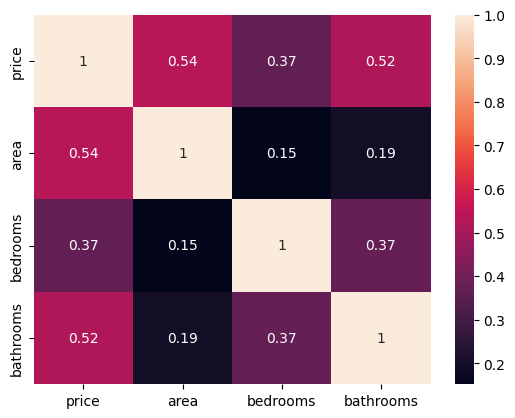

In [82]:
features = ['price', 'area', 'bedrooms', 'bathrooms']
data_corr = data[features].corr()
sns.heatmap(data_corr, annot = True)
plt.show()

# **Пункти домашнього завдання**

In [83]:
df_features = data[['area', 'bedrooms', 'bathrooms']]
df_prices = data[['price']]

**- напишіть функцію гіпотези лінійної регресії у векторному вигляді;**

$$y_{pred} = \langle X, w\rangle$$




In [84]:
def h(weights, X):
  assert weights.shape[0] == X.shape[1], f'DFs are not aligned: weights shape == {weights.shape} and X shape == {X.shape}'
  return X.dot(weights)

**- створіть функцію для обчислення функції втрат у векторному вигляді;**

$$ J(w_0​,w_1, ... ,w_n)=\frac{1}{2m} \sum_{i=1}^{m}​(h(x^{(i)})−y^{(i)})^2  $$

In [85]:
def loss_func(y_pred, X, y):
  m, n = X.shape
  return np.sum((y_pred - y) ** 2) / (m)

**- реалізуйте один крок градієнтного спуску;**

$$
∇J(\vec{w})=\frac{1}{m}​  X^T(X \vec{w} - \vec{y}​)
$$

In [86]:
def gradient_step(y_pred, X, y):
  m, n = X.shape
  return 1/m * X.T.dot(y_pred - y)

**- знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;**


In [87]:
from sklearn.linear_model import LinearRegression

features = df_features.to_numpy()
prices = df_prices.to_numpy()

model = LinearRegression()
model.fit(features, prices)

LinearRegression()

In [88]:
print(f'Коефіціенти моделі (coef): {model.coef_}')
print(f'Коефіціенти моделі (intercept): {model.intercept_}')

Коефіціенти моделі (coef): [[3.78762754e+02 4.06820034e+05 1.38604950e+06]]
Коефіціенти моделі (intercept): [-173171.60763264]


In [89]:
# виконаємо тест по першій стрічці таблиці
test_pred = np.array([[8960, 4, 4]])
a = model.predict(test_pred)[0][0]
print(f'Результат тесту прогнозування: {a}')
b = model.intercept_ + 8960 * model.coef_[0][0] + 4 * model.coef_[0][1] + 4 * model.coef_[0][2]
print(f'Результат тесту по коефіцієнтам: {b[0]}')

Результат тесту прогнозування: 10392020.790730618
Результат тесту по коефіцієнтам: 10392020.790730618


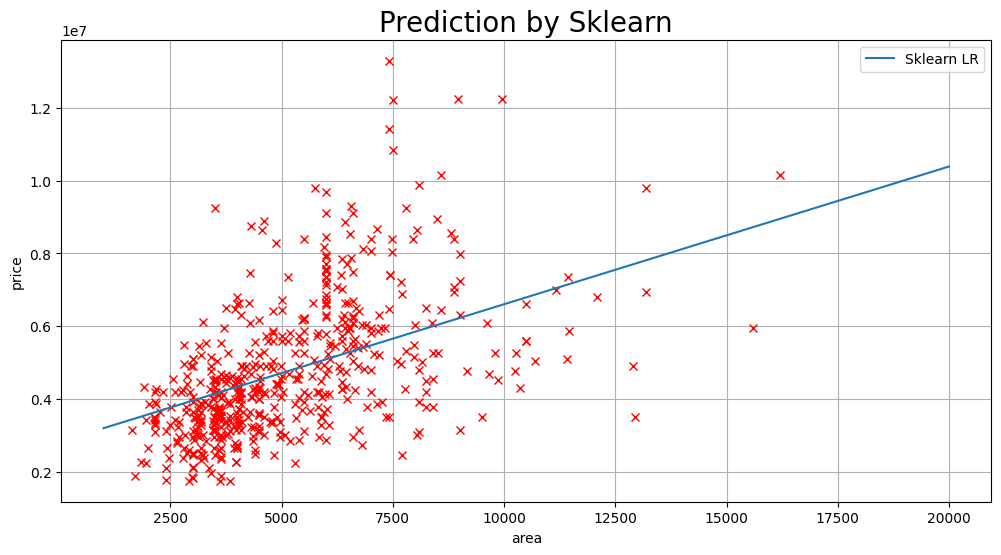

In [90]:
area_mean = data['area'].mean()
bedrooms_mean = data['bedrooms'].mean()
bathrooms_mean = data['bathrooms'].mean()

def h_lin(w_0, weights, params):
  result = []
  x_area = params[0]

  for i in x_area:
    result.append(w_0[0] + i * weights[0][0] + params[1] * weights[0][1] + params[2] * weights[0][2])

  return np.array(result)

plt.figure(figsize = (12,6))
plt.plot(data.area, data.price, 'rx')
x = np.linspace(1000, 20000, 545)
plt.plot(x, h_lin(model.intercept_, model.coef_, (x, bedrooms_mean, bathrooms_mean)), label = ('Sklearn LR'))
plt.xlabel('area')
plt.ylabel('price')
plt.title('Prediction by Sklearn', size=20)
plt.legend()
plt.grid()

**- знайдіть ці ж параметри за допомогою аналітичного рішення;**

In [91]:
def fill_price_pred(row, **kwargs):
  price_pred = model.predict(np.array([[row.area, row.bedrooms, row.bathrooms]]))
  price_pred = round(price_pred[0][0], -3)

  price_analytical = round(kwargs['area_mean'] * row.price / row.area, -3)

  dif_1 = row.price - price_pred
  dif_2 = row.price - price_analytical

  return [row.area, row.bedrooms, row.bathrooms, row.price, price_pred, dif_1, price_analytical, dif_2]

data_analytical_solution = data[['area', 'bedrooms', 'bathrooms', 'price']]
data_analytical_solution.insert(4, 'price_pred', 0)
data_analytical_solution.insert(5, 'dif_1', 0)
data_analytical_solution.insert(6, 'price_analytical', 0)
data_analytical_solution.insert(7, 'dif_2', 0)


data_analytical_solution = data_analytical_solution.apply(fill_price_pred,  axis=1, result_type='broadcast', area_mean=area_mean)
data_analytical_solution.head()

,area,bedrooms,bathrooms,price,price_pred,dif_1,price_analytical,dif_2
0,7420,4,2,13300000,7037000,6263000,9232000,4068000
1,8960,4,4,12250000,10392000,1858000,7042000,5208000
2,9960,3,2,12250000,7592000,4658000,6335000,5915000
3,7500,4,2,12215000,7067000,5148000,8389000,3826000
4,7420,4,1,11410000,5651000,5759000,7920000,3490000


**- порівняйте отримані результати**

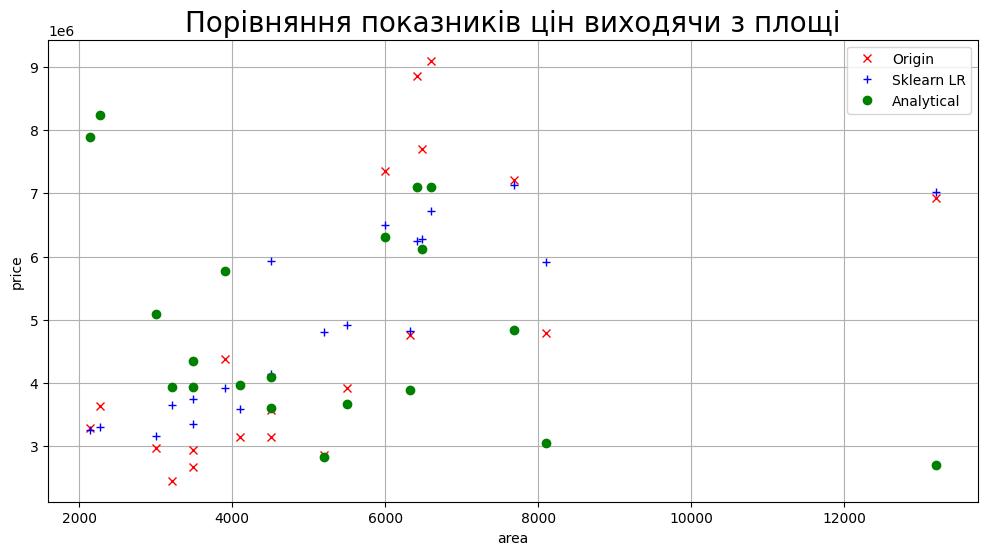

In [92]:
df_sort = data_analytical_solution.sort_values('area').sample(20)
plt.figure(figsize = (12,6))
plt.plot(df_sort.area, df_sort.price, 'rx', label = 'Origin')
plt.plot(df_sort.area, df_sort.price_pred, 'b+', label = 'Sklearn LR')
plt.plot(df_sort.area, df_sort.price_analytical, 'go', label = 'Analytical')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Порівняння показників цін виходячи з площі', size=20)
plt.legend()
plt.grid()

Порівняння робив за такими показниками:

**Origin** - це вихідні дані датасету;

**Sklearn LR** - це результат прогнозування, використовуючи бібліотеку "sklearn";

**Analytical** - це результат розрахунку за аналітичним методом (пропорція від середньої площі)

**Висновок:**

Використовуючи виборку випадкових рядків з датасету, на графіку бачимо, що розрахунок з використанням бібліотеки "sklearn" в більшості випадків набагато точніший, ніж аналітичний розрахунок.